In [4]:
# Import libraries
import os
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

In [5]:
# laod dataset
url="C:/Users/PRIYANSHU/Deep Learning/DL_MS/archive (13)/raw-img"
class_names = sorted(os.listdir(url))

In [6]:
# Count the number of classes
num_classes = len(class_names)

# Print the class names and the total number of classes
print("Class Names: \n", class_names)
print("Number of Classes:", num_classes)

Class Names: 
 ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of Classes: 10


In [7]:
# Get the number of samples in each class
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(url + "/" + name))
    class_sizes.append(class_size)
    
# Print the class distribution
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]


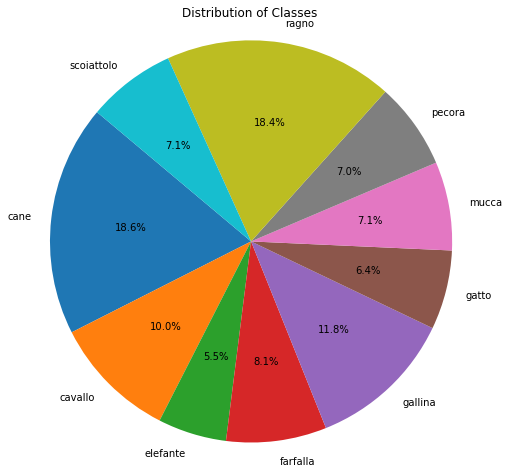

In [8]:
# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_sizes, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [9]:
# displaying a random image
random_class = random.choice(class_names)
class_dir = os.path.join(url, random_class)
image_filenames = os.listdir(class_dir)
random_image_filename = random.choice(image_filenames)

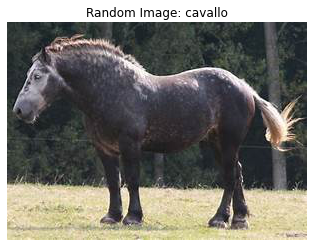

In [10]:
random_image_path = os.path.join(class_dir, random_image_filename)
random_image = imread(random_image_path)

plt.imshow(random_image)
plt.title('Random Image: ' + random_class)
plt.axis('off')
plt.show()

In [11]:
img_height, img_width = 128, 128 #somehow computationally efiicient
batch_size = 128

In [12]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split data into training and validation sets
)

In [13]:
# Load and preprocess the dataset
train_generator = train_datagen.flow_from_directory(
    url,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use training subset for training data
)

Found 20947 images belonging to 10 classes.


In [14]:
validation_generator = train_datagen.flow_from_directory(
    url,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation subset for validation data
)

Found 5232 images belonging to 10 classes.


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    url,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

Found 26179 images belonging to 10 classes.


In [16]:
# Baseline model
def baseline_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [17]:
input_shape = (128, 128, 3)  # Example input shape, adjust according to your images
num_classes = 10  # Number of classes in your dataset

In [18]:
# Initialize and compile the model
model = baseline_cnn(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [20]:
epochs = 10

In [21]:
# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
163/163 [==============================] - 514s 3s/step - loss: 2.0467 - accuracy: 0.2697 - val_loss: 1.8211 - val_accuracy: 0.3578
Epoch 2/10
163/163 [==============================] - 440s 3s/step - loss: 1.7053 - accuracy: 0.4040 - val_loss: 1.6017 - val_accuracy: 0.4457
Epoch 3/10
163/163 [==============================] - 260s 2s/step - loss: 1.5301 - accuracy: 0.4742 - val_loss: 1.4743 - val_accuracy: 0.4975
Epoch 4/10
163/163 [==============================] - 259s 2s/step - loss: 1.4143 - accuracy: 0.5151 - val_loss: 1.3616 - val_accuracy: 0.5260
Epoch 5/10
163/163 [==============================] - 259s 2s/step - loss: 1.3546 - accuracy: 0.5329 - val_loss: 1.3170 - val_accuracy: 0.5469
Epoch 6/10
163/163 [==============================] - 260s 2s/step - loss: 1.2749 - accuracy: 0.5620 - val_loss: 1.2838 - val_accuracy: 0.5562
Epoch 7/10
163/163 [==============================] - 262s 2s/step - loss: 1.2450 - accuracy: 0.5754 - val_loss: 1.1912 - val_accuracy: 0.5785

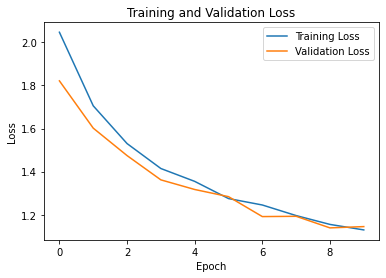

In [22]:
# Training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [23]:
# Test
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

205/205 [==============================] - 181s 882ms/step - loss: 1.0828 - accuracy: 0.6323
Test Loss: 1.0828218460083008
Test Accuracy: 0.6323388814926147


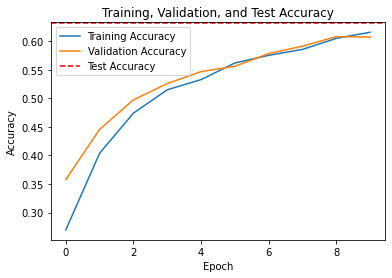

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()

In [25]:
# With batch normalization
def batch(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [26]:
model2 = batch(input_shape, num_classes)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                      

In [28]:
# Train the model
history_with_bn = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
163/163 [==============================] - 393s 2s/step - loss: 1.7528 - accuracy: 0.4123 - val_loss: 5.7001 - val_accuracy: 0.1840
Epoch 2/10
163/163 [==============================] - 392s 2s/step - loss: 1.3855 - accuracy: 0.5237 - val_loss: 3.0260 - val_accuracy: 0.1898
Epoch 3/10
163/163 [==============================] - 388s 2s/step - loss: 1.2371 - accuracy: 0.5768 - val_loss: 1.8276 - val_accuracy: 0.3725
Epoch 4/10
163/163 [==============================] - 417s 3s/step - loss: 1.1190 - accuracy: 0.6166 - val_loss: 1.3457 - val_accuracy: 0.5195
Epoch 5/10
163/163 [==============================] - 401s 2s/step - loss: 1.0399 - accuracy: 0.6476 - val_loss: 1.5469 - val_accuracy: 0.5066
Epoch 6/10
163/163 [==============================] - 387s 2s/step - loss: 0.9781 - accuracy: 0.6636 - val_loss: 1.3478 - val_accuracy: 0.5662
Epoch 7/10
163/163 [==============================] - 387s 2s/step - loss: 0.9133 - accuracy: 0.6903 - val_loss: 1.1197 - val_accuracy: 0.6158

In [29]:
# Evaluate the model on the test set
test_loss_bn, test_accuracy_bn = model2.evaluate(test_generator)

# Print the test loss and accuracy
print("Test Loss (with Batch Normalization):", test_loss_bn)
print("Test Accuracy (with Batch Normalization):", test_accuracy_bn)


205/205 [==============================] - 133s 647ms/step - loss: 1.2529 - accuracy: 0.6079
Test Loss (with Batch Normalization): 1.2528843879699707
Test Accuracy (with Batch Normalization): 0.6079300045967102


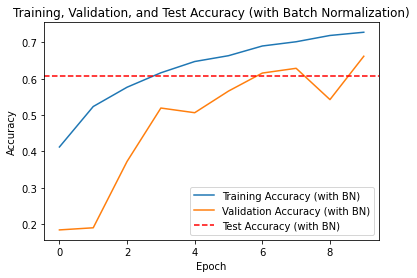

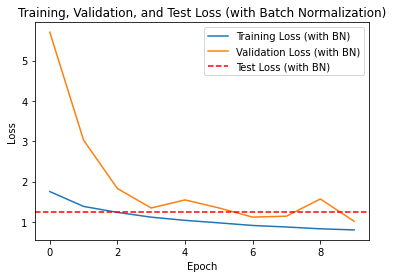

In [30]:
# Plot training, validation, and test accuracy
plt.plot(history_with_bn.history['accuracy'], label='Training Accuracy (with BN)')
plt.plot(history_with_bn.history['val_accuracy'], label='Validation Accuracy (with BN)')
plt.axhline(y=test_accuracy_bn, color='r', linestyle='--', label='Test Accuracy (with BN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy (with Batch Normalization)')
plt.legend()
plt.show()

# Plot training, validation, and test loss
plt.plot(history_with_bn.history['loss'], label='Training Loss (with BN)')
plt.plot(history_with_bn.history['val_loss'], label='Validation Loss (with BN)')
plt.axhline(y=test_loss_bn, color='r', linestyle='--', label='Test Loss (with BN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss (with Batch Normalization)')
plt.legend()
plt.show()

### Visualizations

In [1]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [35]:
from visualkeras import layered_view
from tensorflow.keras.utils import plot_model

In [52]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [34]:
plot_model(model, to_file='baseline_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


ValueError: Could not save to JPEG for display

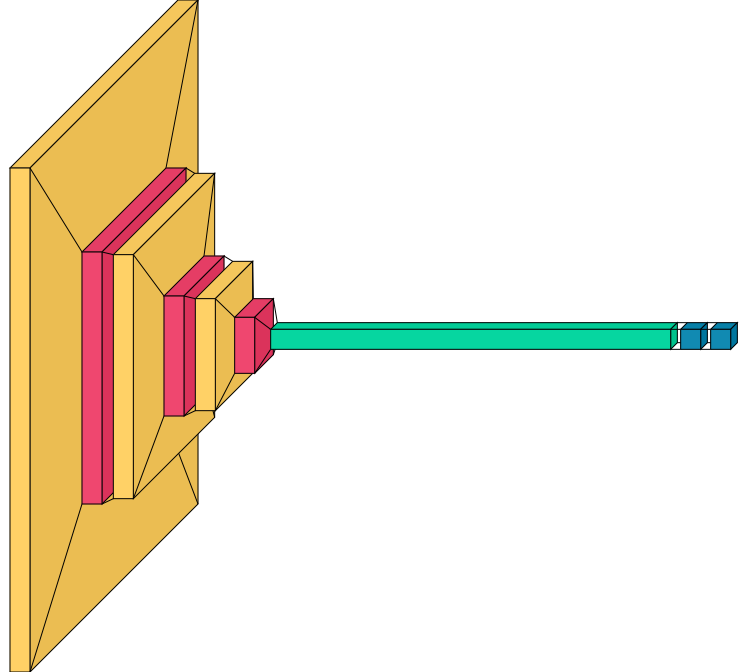

In [42]:
plot_model(model, to_file='baseline_model.png', show_shapes=True)
layered_view(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


ValueError: Could not save to JPEG for display

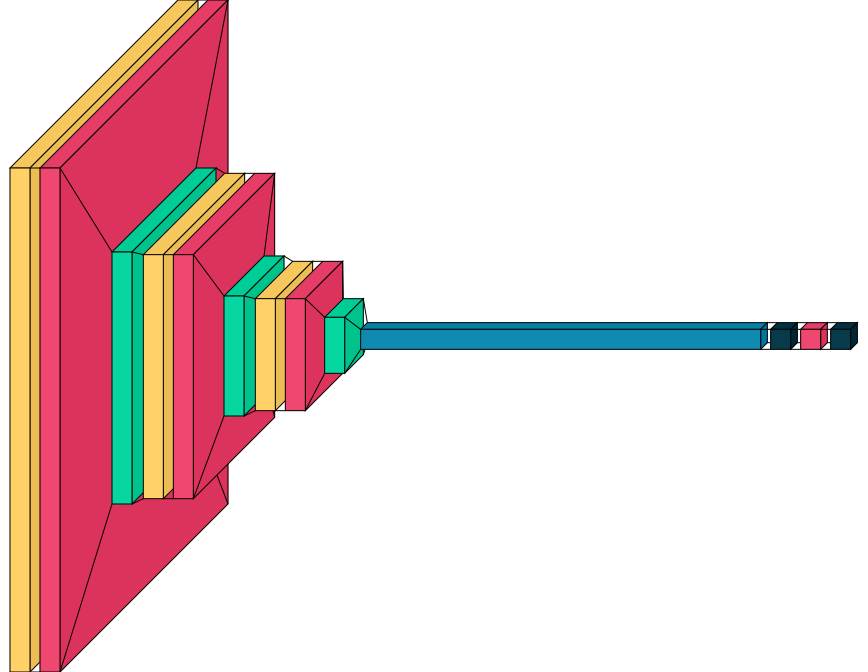

In [43]:
# Visualize the model with batch normalization
plot_model(model2, to_file='model_with_bn.png', show_shapes=True)
layered_view(model2)